In [ ]:
import torch

if torch.cuda.is_available():
  device = torch.device("cuda")
  x = torch.ones(5, device = device)
  y = torch.ones(5)
  y = y.to(device)
  z = x+y
# z = z.numpy(), not working if you are using gpu, first change it to cpu then try
  z = z.to("cpu")
  z = z.numpy()

## Gardient Calculation with Autograd

In [ ]:
import torch
# requires_grad = True , to specify gradients
x = torch.randn(3, requires_grad=True) 
print(x)

y = x + 2
print(y)

z = y*y*2
z = z.mean()
print(z)

tensor([1.8390, 0.9324, 0.6895], requires_grad=True)
tensor([3.8390, 2.9324, 2.6895], grad_fn=<AddBackward0>)
tensor(20.3804, grad_fn=<MeanBackward0>)


In [ ]:
z.backward() # calculate gradient of z w.r.to x

print(x.grad)

tensor([5.1187, 3.9099, 3.5860])


In [ ]:
# ANOTHER WAY to calculate grad
# requires_grad = True , to specify gradients
x = torch.randn(3, requires_grad=True) 
print(x)

y = x + 2
print(y)

z = y*y*2


#   z = z.mean(), its a scaler value what if we do not use it and try to get z.backward()
#   then it is show that backard function takes only scaler value to create gard 
print(z)

# now we will create a vector of same size
v = torch.tensor([0.1, 1.0, 0.001], dtype= torch.float32)
z.backward(v)
print(x.grad)

tensor([-0.6755,  0.2173,  0.7210], requires_grad=True)
tensor([1.3245, 2.2173, 2.7210], grad_fn=<AddBackward0>)
tensor([ 3.5084,  9.8328, 14.8079], grad_fn=<MulBackward0>)
tensor([0.5298, 8.8692, 0.0109])


# Preventing pytorch for tracking gardient history

in some cases, we may not want PyTorch to track the gradient history of certain tensors. One common scenario is during inference or evaluation, where we do not need to update the model parameters and backpropagate gradients. In such cases, disabling gradient tracking can save memory and computation time.

Additionally, in some advanced scenarios such as adversarial attacks, we may need to modify the gradients manually to fool the model. In such cases, disabling gradient tracking allows us to modify the gradients without interference from PyTorch's automatic differentiation system.




# 3 solution - Use any one
1. x.requires_grad_(False)
2. x.detach(), if doesn't require a gradient
3. with torch.no_grad():


In [ ]:

import torch

x = torch.randn(3, requires_grad=True)
print(x)

#1
# x.requires_grad_(False)
# print(x)

#2
# y = x.detach()
# print(y)

#3 
with torch.no_grad():
  y = x + 2
  print(y)

tensor([ 0.3124,  0.4199, -1.0894], requires_grad=True)
tensor([2.3124, 2.4199, 0.9106])


# Zero the gradient

The reason for zeroing the gradients is to avoid accumulating gradients from previous batches or iterations of the training process. During training, the gradients of the loss function with respect to the model's parameters are computed and used to update the parameters in the direction of decreasing loss. If we do not zero the gradients before computing them for the next batch, the gradients will be accumulated from the previous batch, which can lead to incorrect updates and slow down the training process.



In [ ]:
# Part-1, here no zeroing of gradient
import torch

# weight = w
w = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (w*3).sum()

  model_output.backward()

  print(w.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [ ]:
# Part-2
w = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (w*3).sum()

  model_output.backward()

  print(w.grad)

  w.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
# part-3
# IN Optimizers
w = torch.ones(4, requires_grad=True)

optimizer = torch.optim.SGD(w, lr=0.01)

optimizer.step() # optimization step

optimizer.zero_grad()



## Backpropagation

In [54]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward Pass and compute the lass
y_hat = w * x 
loss = (y_hat - y)**2  # (1-2)**2  = 1

print(w.grad)
print(loss)

# backward pass
loss.backward() 
print(w.grad)

# updates weights
# next do some no. of forward and backward pass

None
tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


## Gradient Descent with Autograd and Backpropagation

In [ ]:
import torch

x = torch.tensor([1,2,3,4,], dtype=torch.float32)
y = torch.tensor([2,4,6,8,], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_pred):
  return ((y_pred-y)**2).mean()

print(f'Prediction Before Training: f(5) = {forward(5):.3f}')

# Training Start From Here
learning_rate = 0.01
n_epoch = 75

for epoch in range(n_epoch):
  # prediction = forward pass
  y_pred = forward(x)

  # loss
  l = loss(y, y_pred)

  # gradients = backward pass
  #dw = gradient(x, y, y_pred)

  l.backward() # dl/dw

  # updates weight 
  with torch.no_grad():
    w -= learning_rate* w.grad   

  # zero gardients
  w.grad.zero_()

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction After Training: f(5) = {forward(5):.3f}')

Prediction Before Training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
epoch 31: w = 1.987, loss = 0.00174685
epoch 33: w = 1.991, loss = 0.00091188
epoch 35: w = 1.993, loss = 0.00047601
epoch 37: w = 1.995, loss = 0.00024848
epoch 39: w = 1.996, loss = 0.00012971
epoch 41: w = 1.997, loss = 0.00006770
epoch 43: w = 1.998, loss = 0.00003534
epoch 45: w = 1.999, loss = 0.00001845
epoch 47: w = 1.999, loss = 0.00000963
epoch 49: w = 1.999, loss 

# Training Pipeline: Model, Loss, Optimizer

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype = torch.float32)

n_samples, n_features = x.shape
print(n_samples, n_features)

#define Model
input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size) 

print(f'Prediction Before Training: f(5) = {model(x_test).item():.3f}')
  

# Training Start From Here
learning_rate = 0.01
n_epoch = 75

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_epoch):
  # prediction = forward pass
  # y_pred = forward(x)
  y_pred = model(x)


  # loss
  l = loss(y, y_pred)

  # gradients = backward pass
  #dw = gradient(x, y, y_pred)

  l.backward() # dl/dw

  # updates weight 
  with torch.no_grad():
    w -= learning_rate* w.grad   

  # zero gardients
  w.grad.zero_()

  if epoch % 2 == 0:
    # unpacking of parameters is very important  
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction After Training: f(5) = {model(x_test).item():.3f}')

4 1
Prediction Before Training: f(5) = -1.495
epoch 1: w = -0.108, loss = 44.29792404
epoch 3: w = 0.874, loss = 21.78318405
epoch 5: w = 1.275, loss = 11.44331360
epoch 7: w = 1.564, loss = 6.04583549
epoch 9: w = 1.773, loss = 3.22831845
epoch 11: w = 1.924, loss = 1.75755680
epoch 13: w = 2.033, loss = 0.98980999
epoch 15: w = 2.112, loss = 0.58904219
epoch 17: w = 2.169, loss = 0.37983838
epoch 19: w = 2.210, loss = 0.27063257
epoch 21: w = 2.240, loss = 0.21362631
epoch 23: w = 2.262, loss = 0.18386887
epoch 25: w = 2.277, loss = 0.16833520
epoch 27: w = 2.288, loss = 0.16022673
epoch 29: w = 2.297, loss = 0.15599391
epoch 31: w = 2.302, loss = 0.15378442
epoch 33: w = 2.307, loss = 0.15263101
epoch 35: w = 2.310, loss = 0.15202896
epoch 37: w = 2.312, loss = 0.15171465
epoch 39: w = 2.314, loss = 0.15155061
epoch 41: w = 2.315, loss = 0.15146495
epoch 43: w = 2.316, loss = 0.15142022
epoch 45: w = 2.316, loss = 0.15139690
epoch 47: w = 2.317, loss = 0.15138471
epoch 49: w = 2.317




## Logistic Regression


In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target

n_samples, n_features = x.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# convert it to torch tensor
x_train  = torch.from_numpy(x_train.astype(np.float32))
x_test  = torch.from_numpy(x_test.astype(np.float32))
y_train  = torch.from_numpy(y_train.astype(np.float32))
y_test  = torch.from_numpy(y_test.astype(np.float32))
 

# reshape
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)
 

In [ ]:
# 1. Model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)  # input and output size

  def forward(self, x):
     y_predicted = torch.sigmoid(self.linear(x))
     return y_predicted

model = LogisticRegression(n_features)


In [ ]:
#2. Learning rate, Loss And Optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
#3. Training Loop
num_epoch = 1000
for epoch in range(num_epoch):
  # forward pass and loss
  y_predicted = model(x_train)
  loss = criterion(y_predicted , y_train)

  # backward pass
  loss.backward()

  # updates
  optimizer.step()

  # zero grad
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'Epoch: {epoch+1}, Loss = {loss.item():.4f}')

with torch.no_grad():
  y_predicted = model(x_test) # to get accuracy
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'Accuracy = {acc:.4f}')
   

Epoch: 10, Loss = 0.1013
Epoch: 20, Loss = 0.1007
Epoch: 30, Loss = 0.1001
Epoch: 40, Loss = 0.0996
Epoch: 50, Loss = 0.0990
Epoch: 60, Loss = 0.0985
Epoch: 70, Loss = 0.0980
Epoch: 80, Loss = 0.0975
Epoch: 90, Loss = 0.0970
Epoch: 100, Loss = 0.0965
Epoch: 110, Loss = 0.0960
Epoch: 120, Loss = 0.0955
Epoch: 130, Loss = 0.0951
Epoch: 140, Loss = 0.0946
Epoch: 150, Loss = 0.0941
Epoch: 160, Loss = 0.0937
Epoch: 170, Loss = 0.0933
Epoch: 180, Loss = 0.0929
Epoch: 190, Loss = 0.0924
Epoch: 200, Loss = 0.0920
Epoch: 210, Loss = 0.0916
Epoch: 220, Loss = 0.0912
Epoch: 230, Loss = 0.0908
Epoch: 240, Loss = 0.0905
Epoch: 250, Loss = 0.0901
Epoch: 260, Loss = 0.0897
Epoch: 270, Loss = 0.0894
Epoch: 280, Loss = 0.0890
Epoch: 290, Loss = 0.0887
Epoch: 300, Loss = 0.0883
Epoch: 310, Loss = 0.0880
Epoch: 320, Loss = 0.0876
Epoch: 330, Loss = 0.0873
Epoch: 340, Loss = 0.0870
Epoch: 350, Loss = 0.0867
Epoch: 360, Loss = 0.0863
Epoch: 370, Loss = 0.0860
Epoch: 380, Loss = 0.0857
Epoch: 390, Loss = 0.

## Dataset & DataLoader

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [ ]:
class WineDataset(Dataset):

  def __init__(self):
    # Data Loading
    xy = np.loadtxt('wine.csv', delimiter =",", dtype=np.float32, skiprows = 1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]]) # n_samples = 1
    self.n_samples = xy.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples
    


In [ ]:
dataset= WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

In [ ]:
# Training Loop
num_epoch = 2
total_samples = len(dataset)
n_iteration = math.ceil(total_samples/4)

In [ ]:
for epoch in range(num_epoch):
  for i, (input, labels) in enumerate(dataloader):
    # forward backward, update
    if(i+1) % 5 == 0:
      print(f'epoch {epoch+1}/{num_epoch}, step{i+1}/{n_iteration}, input {input.shape}')

epoch 1/2, step5/45, input torch.Size([4, 13])
epoch 1/2, step10/45, input torch.Size([4, 13])
epoch 1/2, step15/45, input torch.Size([4, 13])
epoch 1/2, step20/45, input torch.Size([4, 13])
epoch 1/2, step25/45, input torch.Size([4, 13])
epoch 1/2, step30/45, input torch.Size([4, 13])
epoch 1/2, step35/45, input torch.Size([4, 13])
epoch 1/2, step40/45, input torch.Size([4, 13])
epoch 1/2, step45/45, input torch.Size([2, 13])
epoch 2/2, step5/45, input torch.Size([4, 13])
epoch 2/2, step10/45, input torch.Size([4, 13])
epoch 2/2, step15/45, input torch.Size([4, 13])
epoch 2/2, step20/45, input torch.Size([4, 13])
epoch 2/2, step25/45, input torch.Size([4, 13])
epoch 2/2, step30/45, input torch.Size([4, 13])
epoch 2/2, step35/45, input torch.Size([4, 13])
epoch 2/2, step40/45, input torch.Size([4, 13])
epoch 2/2, step45/45, input torch.Size([2, 13])


## Dataset Transform
Tranform used for:
1. Data normalization: Transforms can be used to normalize the data so that the mean and standard deviation of the data are zero and one, respectively. This can help improve the training of neural networks, as it ensures that the input data is on the same scale.

2. Data augmentation: Transforms can be used to augment the training data by applying various transformations, such as rotation, scaling, cropping, flipping, and color jittering. This can help the neural network generalize better to new and unseen data.

3. Data conversion: Transforms can be used to convert the data from one format to another. For example, images can be converted from RGB to grayscale, or text can be converted from raw text to numerical vectors.

4. Data preprocessing: Transforms can be used to preprocess the data before it is fed to the neural network. For example, text data can be tokenized and lowercased, or images can be resized and cropped to a fixed size.

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [ ]:
class WineDataset(Dataset):

  def __init__(self, transform = None):
    # Data Loading
    xy = np.loadtxt('wine.csv', delimiter =",", dtype=np.float32, skiprows = 1)
    self.n_samples = xy.shape[0]

    # not converting to tensor here
    self.x = xy[:, 1:]
    self.y = xy[:, [0]] # n_samples = 1
    self.transform = transform


  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
   
    if self.transform:
      sample = self.transform(sample)
    return sample


  def __len__(self):
    return self.n_samples
    


In [ ]:
class ToTensor():
  def __call__(self, sample):
    inputs, targets = sample    # unpacking sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform():
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, sample):
    inputs, targets = sample    # unpacking sample
    inputs *= self.factor
    return inputs, targets

In [ ]:
dataset = WineDataset(transform=None)  # using None for not converting to tensor 
first_data = dataset[0]
features, lables = first_data
print(features)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])  # value is 4 times of upper tensor 
dataset = WineDataset(transform=None)  # using None for not converting to tensor 
first_data = dataset[0]
features, lables = first_data
print(features)
print(type(features), type(labels))


[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
<class 'numpy.ndarray'> <class 'torch.Tensor'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
<class 'numpy.ndarray'> <class 'torch.Tensor'>


## Softmax

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis
print('softmax torch:', outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])


# Cross Entropy

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
loss = nn.CrossEntropyLoss()

In [ ]:
# 3 sample
y =torch.tensor([2,0,1])

In [ ]:
# nsample * nclasses = 3*3
y_pred_good = torch.tensor([[0.1 ,1.0, 2.1], [2.0, 1.0, 0.1],[2.0, 1.0, 0.1,]])
y_pred_bad = torch.tensor([[2.1, 1.0, 0.1,], [0.1, 1.0, 2.1],[0.1, 3.0, 0.1]])

In [ ]:
l1 = loss(y_pred_good, y)
l2 = loss(y_pred_bad, y)


In [ ]:
print(l1.item())
print(l2.item())


0.7393671870231628
1.6241613626480103


In [ ]:
_, predictions1 = torch.max(y_pred_good, 1)
_, predictions2 = torch.max(y_pred_bad, 1)
print(predictions1)
print(predictions2)

tensor([2, 0, 0])
tensor([0, 2, 1])


# Neural Network...

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# Binary classification Problem
class NeuralNet1(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet2, self).__init()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    # sigmoid at the end
    y_pred = torch.sigmoid(out)
    return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5 )
criterion = nn.BCELoss()  # applies softmax

In [ ]:
# Multiclassification Problem
class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet2, self).__init()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    # no softmax at the end
    return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # applies softmax

#CNN

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [27]:
# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

In [28]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
# using Compose() to Compose several transform together
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [29]:
# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [30]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [31]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)


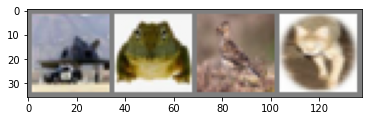

In [37]:
# show images
imshow(torchvision.utils.make_grid(images))

#conv1 = nn.Conv2d(3,6,5)
#pool = nn.MaxPool2d(2, 2)
#conv2 = nn.Conv2d(6, 16, 5)
                                    # Formula = (W-F + 2P)/S + 1
                                    # here (32-5 + 2*0)/1 +1 = 28
#print(images.shape)
#x = conv1(images)
#print(x.shape)
#x = pool(x)
#print(x.shape)
#x = conv2(x)
#print(x.shape)
#x = pool(x)
#print(x.shape)

**Working of Fully Connected Layer**

The purpose of a fully connected layer is to transform the input data into a different representation, which can then be used as input to the next layer in the network

In [43]:

class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # input_size, output_size, kernals
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)   # fully connected layer
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x))) # first apply conv layer then apply AF by calling F, and AF doesn;t change size so apply pooling layer
    x = self.pool(F.relu(self.conv2(x)))
    # now passing to fully connected layer and for this we have to flatten it so..
    x = x.view(-1, 16*5*5)   #  x.view(-1, it defines the correct size for us
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [44]:
model = ConvNet().to(device)

In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [46]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

Epoch [1/5], Step [2000/12500], Loss: 2.3351
Epoch [1/5], Step [4000/12500], Loss: 2.3088
Epoch [1/5], Step [6000/12500], Loss: 2.3209
Epoch [1/5], Step [8000/12500], Loss: 2.3105
Epoch [1/5], Step [10000/12500], Loss: 2.2793
Epoch [1/5], Step [12000/12500], Loss: 2.3381
Epoch [2/5], Step [2000/12500], Loss: 1.8339
Epoch [2/5], Step [4000/12500], Loss: 1.3055
Epoch [2/5], Step [6000/12500], Loss: 1.8897
Epoch [2/5], Step [8000/12500], Loss: 1.7539
Epoch [2/5], Step [10000/12500], Loss: 1.6131
Epoch [2/5], Step [12000/12500], Loss: 1.9809
Epoch [3/5], Step [2000/12500], Loss: 1.8743
Epoch [3/5], Step [4000/12500], Loss: 1.8812
Epoch [3/5], Step [6000/12500], Loss: 1.7218
Epoch [3/5], Step [8000/12500], Loss: 1.3636
Epoch [3/5], Step [10000/12500], Loss: 0.7911
Epoch [3/5], Step [12000/12500], Loss: 1.8173
Epoch [4/5], Step [2000/12500], Loss: 1.7094
Epoch [4/5], Step [4000/12500], Loss: 1.0393
Epoch [4/5], Step [6000/12500], Loss: 0.8443
Epoch [4/5], Step [8000/12500], Loss: 1.8959
Epoc

In [49]:
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

In [48]:
# For Accuracy
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 49.27 %
Accuracy of plane: 59.9 %
Accuracy of car: 76.6 %
Accuracy of bird: 29.5 %
Accuracy of cat: 41.0 %
Accuracy of deer: 29.5 %
Accuracy of dog: 43.0 %
Accuracy of frog: 66.9 %
Accuracy of horse: 50.2 %
Accuracy of ship: 45.8 %
Accuracy of truck: 50.3 %


## Transfer Learning

Transfer learning is a machine learning technique where a pre-trained model is used as a starting point for a new task that is different but related to the original task for which the pre-trained model was trained. The idea behind transfer learning is that the pre-trained model has already learned useful features from a large dataset, and these features can be reused for a new task with a smaller dataset.

In transfer learning, the pre-trained model is typically a deep neural network that has been trained on a large-scale dataset, such as ImageNet for image classification or BERT for natural language processing. The pre-trained model is then modified by removing the final layers and replacing them with new layers that are specific to the new task.

**You can do 2 thing**

1. Fine tune Model to get higher accruacy  - More Accurate

2. Train with last layer of pre-trained Model - Good but less accurate then Fine tuning